Importing libraries:

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

Part A: Data Preprocessing Tasks

1. Data Inspection:

In [83]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\Retail_Transactions_2000.csv",encoding='latin1')
print("Shape:",df.shape)
print("Column Data Types:\n",df.dtypes)
print("Sample Data:\n",df.head())
print("Missing Values:\n", df.isnull().sum())
print("\nNumber of Duplicate Rows:", df.duplicated().sum())
print("\nSummary Statistics:\n", df.describe())

Shape: (2000, 11)
Column Data Types:
 TransactionID      object
CustomerID         object
Gender             object
Age                 int64
City               object
ProductCategory    object
Quantity            int64
Price               int64
PurchaseDate       object
PaymentMode        object
TotalAmount         int64
dtype: object
Sample Data:
   TransactionID CustomerID  Gender  Age       City ProductCategory  Quantity  \
0        T00001      C2824  Female   33  Bengaluru         Fashion         3   
1        T00002      C1409   Other   20       Pune           Books         5   
2        T00003      C5506   Other   47       Pune       Furniture         1   
3        T00004      C5012   Other   21  Hyderabad       Groceries         5   
4        T00005      C4657  Female   41    Chennai          Sports         1   

   Price PurchaseDate PaymentMode  TotalAmount  
0   4479   2023-03-15        Cash        13437  
1   1051   2023-01-22        Card         5255  
2    111   2023-04-1

2. Handling Missing Data:

In [84]:
if df['Age'].isnull().sum() > 0:
    median_age = df['Age'].median()
    df['Age'].fillna(median_age, inplace=True)

if df['City'].isnull().sum() > 0:
    mode_city = df['City'].mode()[0]
    df['City'].fillna(mode_city, inplace=True)

df.dropna(subset=['TransactionID', 'ProductCategory'], inplace=True)
print("Missing Values After Handling:\n", df.isnull().sum())
print("\nDataset Shape After Cleaning:", df.shape)

Missing Values After Handling:
 TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

Dataset Shape After Cleaning: (2000, 11)


3. Data Cleaning:

In [85]:
df.drop_duplicates(subset="TransactionID", inplace=True)
df['Gender'] = df['Gender'].str.strip().str.lower()   
df['Gender'] = df['Gender'].replace({
    'm': 'male', 'male': 'Male', 'male ': 'Male',
    'f': 'female', 'female': 'Female',
    'other': 'Other'
})
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
print("\nQuantity Issues Remaining:",(df['Quantity'] <= 0).sum())
print("\nPrice Issues Remaining:",(df['Price'] <= 0).sum())


Quantity Issues Remaining: 0

Price Issues Remaining: 0


4. Feature Engineering:

In [86]:
df['TotalAmount'] = df['Quantity'] * df['Price']

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
df['Month'] = df['PurchaseDate'].dt.month_name()
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()

def categorize_age(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 40:
        return '26-40'
    elif 41 <= age <= 60:
        return '41-60'
    else:
        return '60+'

df['AgeGroup'] = df['Age'].apply(categorize_age)

df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,March,Wednesday,26-40
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,January,Sunday,18-25
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,April,Tuesday,41-60
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,August,Wednesday,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,September,Saturday,41-60


In [87]:
df['HighValueFlag'] = df['TotalAmount'].apply(lambda x: 'High' if x > 10000 else 'Normal')

df['Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Summer'
    elif month in ['June', 'July', 'August']:
        return 'Monsoon'
    else:
        return 'Autumn'
df['Season'] = df['Month'].apply(get_season)

def basket_category(qty):
    if qty <= 2:
        return 'Small'
    elif 3 <= qty <= 5:
        return 'Medium'
    else:
        return 'Bulk'
df['BasketSize'] = df['Quantity'].apply(basket_category)
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup,HighValueFlag,Weekend,Season,BasketSize
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,March,Wednesday,26-40,High,0,Summer,Medium
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,January,Sunday,18-25,Normal,1,Winter,Medium
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,April,Tuesday,41-60,Normal,0,Summer,Small
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,August,Wednesday,18-25,High,0,Monsoon,Medium
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,September,Saturday,41-60,Normal,1,Autumn,Small


5. Encoding & Transformation:

In [88]:
df['Gender_Enc'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

df['PaymentMode_Enc'] = df['PaymentMode'].map({
    'Cash': 0,
    'Card': 1,
    'Wallet': 2,
    'UPI': 3,
    'NetBanking': 4
})

city_mapping = {city: idx for idx, city in enumerate(df['City'].unique())}
df['City_Enc'] = df[
'City'].map(city_mapping)

prod_mapping = {cat: idx for idx, cat in enumerate(df['ProductCategory'].unique())}
df['ProductCategory_Enc'] = df['ProductCategory'].map(prod_mapping)

age_mapping = {'Under 18': 0, '18-25': 1, '26-40': 2, '41-60': 3, '60+': 4}
df['AgeGroup_Enc'] = df['AgeGroup'].map(age_mapping)

df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,...,AgeGroup,HighValueFlag,Weekend,Season,BasketSize,Gender_Enc,PaymentMode_Enc,City_Enc,ProductCategory_Enc,AgeGroup_Enc
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,...,26-40,High,0,Summer,Medium,1,0,0,0,2
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,...,18-25,Normal,1,Winter,Medium,2,1,1,1,1
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,...,41-60,Normal,0,Summer,Small,2,2,1,2,3
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,...,18-25,High,0,Monsoon,Medium,2,0,2,3,1
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,...,41-60,Normal,1,Autumn,Small,1,2,3,4,3


In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age_Scaled', 'Price_Scaled', 'TotalAmount_Scaled']] = scaler.fit_transform(
    df[['Age', 'Price', 'TotalAmount']]
)

df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,...,Season,BasketSize,Gender_Enc,PaymentMode_Enc,City_Enc,ProductCategory_Enc,AgeGroup_Enc,Age_Scaled,Price_Scaled,TotalAmount_Scaled
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,...,Summer,Medium,1,0,0,0,2,0.288462,0.893673,0.536495
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,...,Winter,Medium,2,1,1,1,1,0.038462,0.194082,0.207094
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,...,Summer,Small,2,2,1,2,3,0.557692,0.002245,0.000000
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,...,Monsoon,Medium,2,0,2,3,1,0.057692,0.580816,0.588550
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,...,Autumn,Small,1,2,3,4,3,0.442308,0.616939,0.121261


6. Final Verification:

In [90]:
df.isnull().sum()

TransactionID          0
CustomerID             0
Gender                 0
Age                    0
City                   0
ProductCategory        0
Quantity               0
Price                  0
PurchaseDate           0
PaymentMode            0
TotalAmount            0
Month                  0
DayOfWeek              0
AgeGroup               0
HighValueFlag          0
Weekend                0
Season                 0
BasketSize             0
Gender_Enc             0
PaymentMode_Enc        0
City_Enc               0
ProductCategory_Enc    0
AgeGroup_Enc           0
Age_Scaled             0
Price_Scaled           0
TotalAmount_Scaled     0
dtype: int64

Part B: Data Visualization Tasks

1. Customer Demographics:

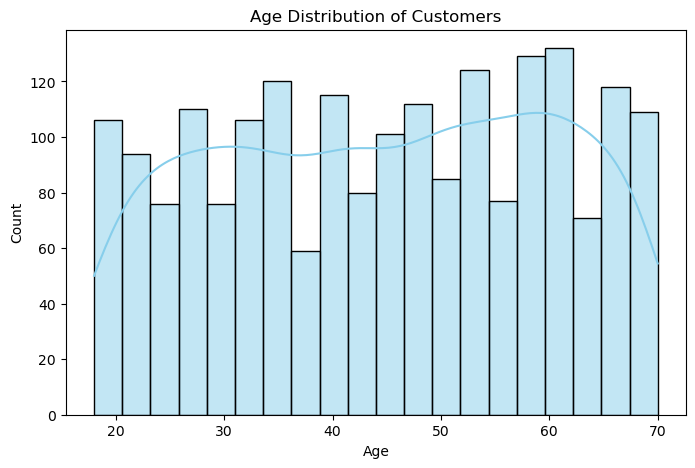

In [105]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

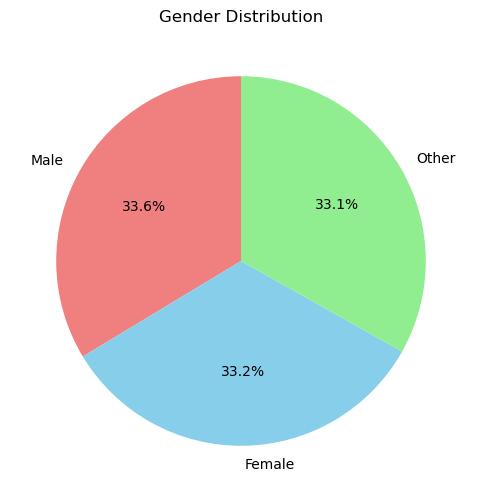

In [106]:
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["lightcoral","skyblue","lightgreen"])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

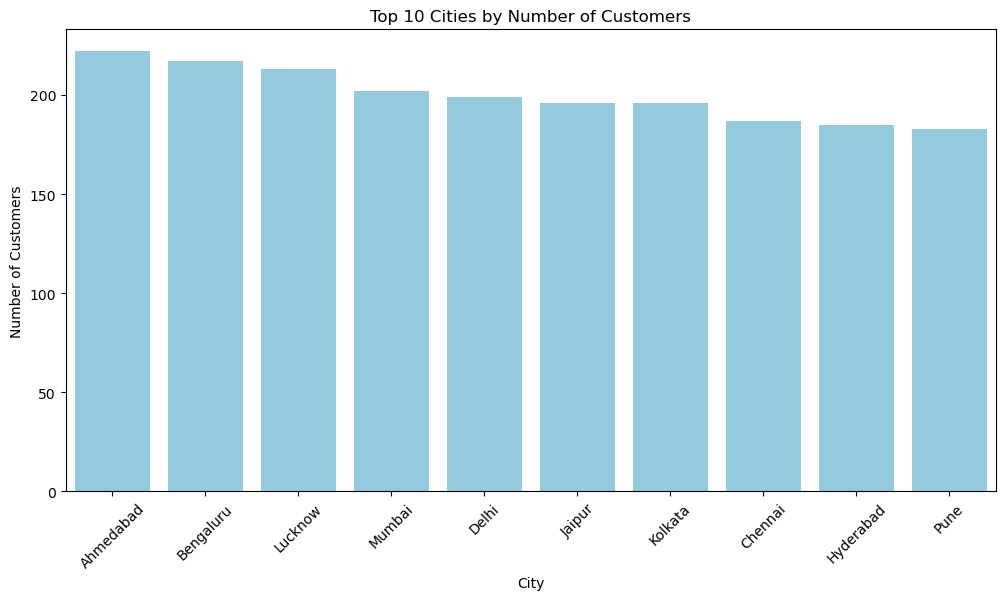

In [107]:
plt.figure(figsize=(12,6))
top_cities = df['City'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values, color="skyblue")  # use color instead of palette
plt.title("Top 10 Cities by Number of Customers")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.show()

2. Sales Insights:

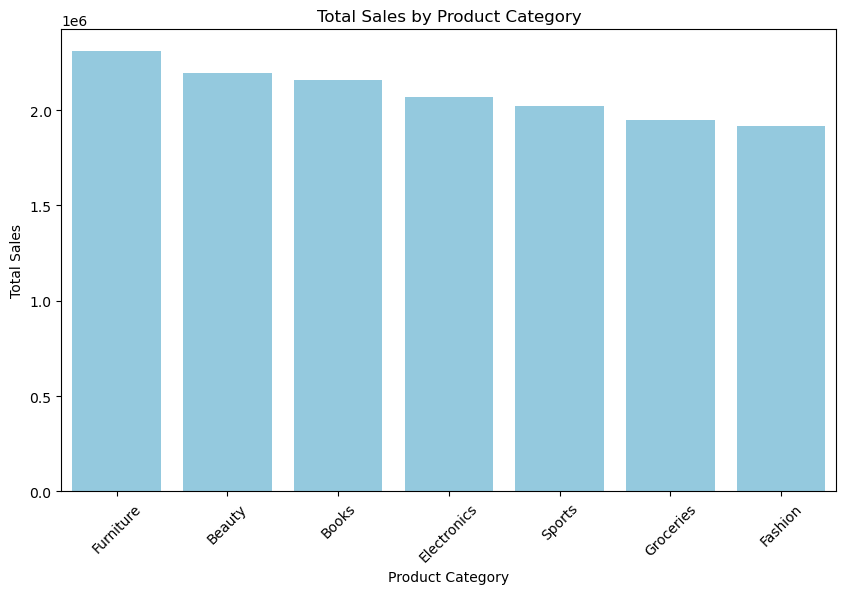

In [108]:
plt.figure(figsize=(10,6))
category_sales = df.groupby("ProductCategory")["TotalAmount"].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, color="skyblue")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

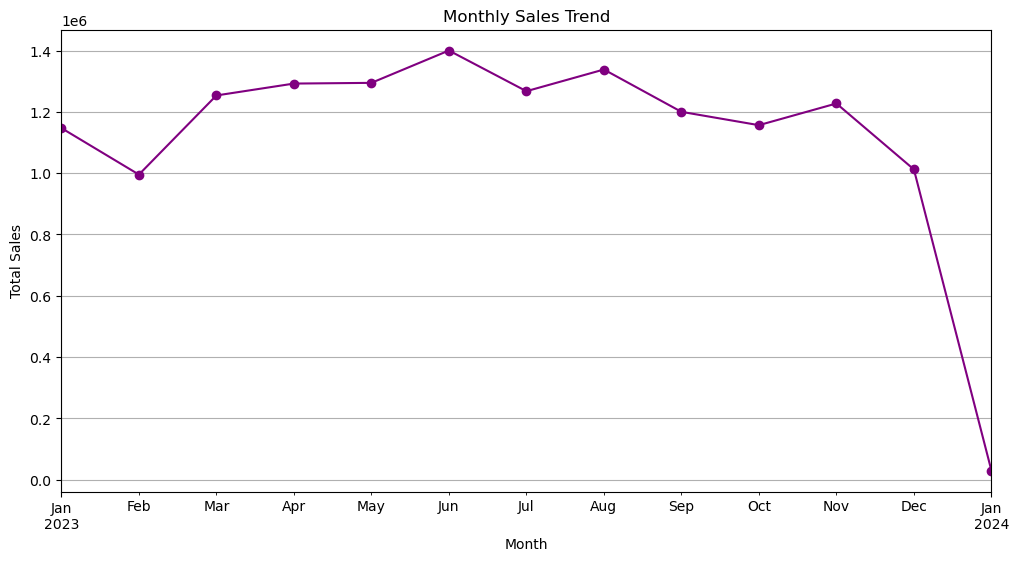

In [109]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
monthly_sales = df.groupby(df['PurchaseDate'].dt.to_period("M"))["TotalAmount"].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind="line", marker="o", color="purple")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

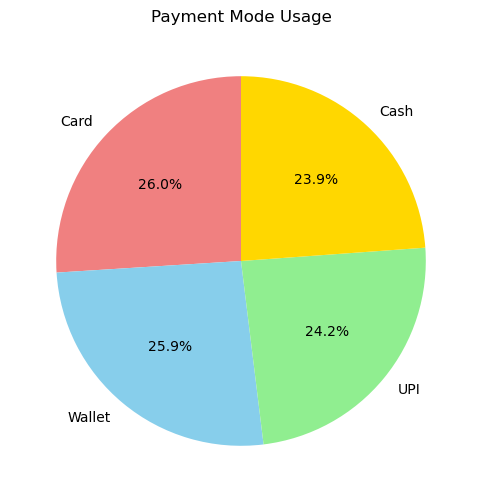

In [110]:
plt.figure(figsize=(6,6))
df['PaymentMode'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,
                                          colors=["lightcoral","skyblue","lightgreen","gold","violet"])
plt.title("Payment Mode Usage")
plt.ylabel("")
plt.show()

3. Advanced Insights:

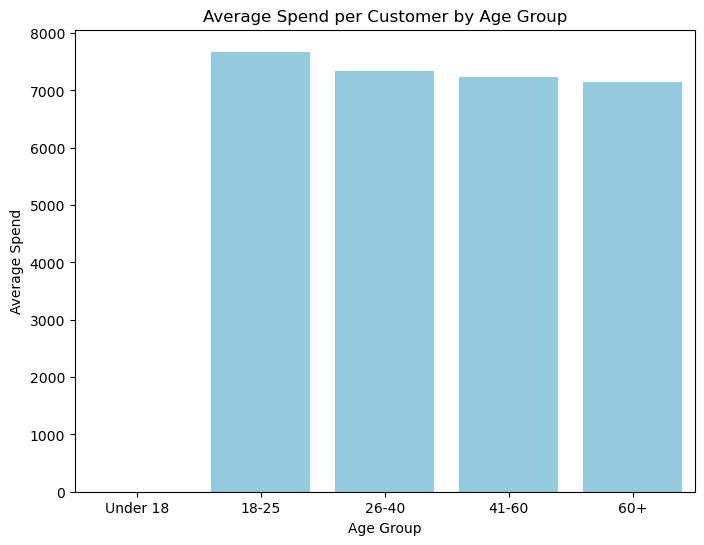

In [111]:
plt.figure(figsize=(8,6))
age_spend = df.groupby("AgeGroup")["TotalAmount"].mean().reindex(["Under 18","18-25","26-40","41-60","60+"])
sns.barplot(x=age_spend.index, y=age_spend.values, color="skyblue")
plt.title("Average Spend per Customer by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spend")
plt.show()


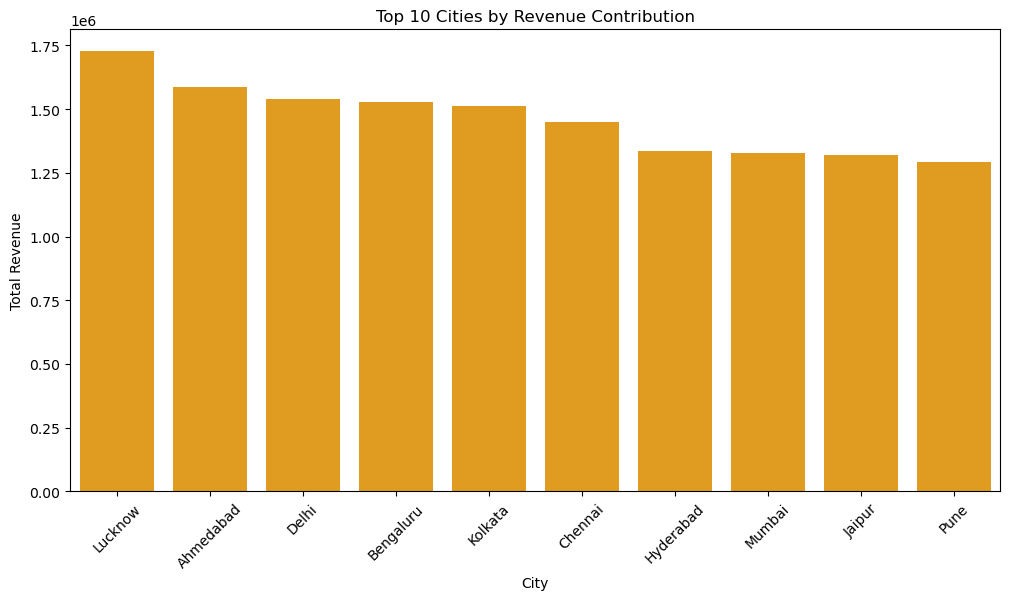

In [112]:
plt.figure(figsize=(12,6))
city_sales = df.groupby("City")["TotalAmount"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=city_sales.index, y=city_sales.values, color="orange")
plt.title("Top 10 Cities by Revenue Contribution")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.show()

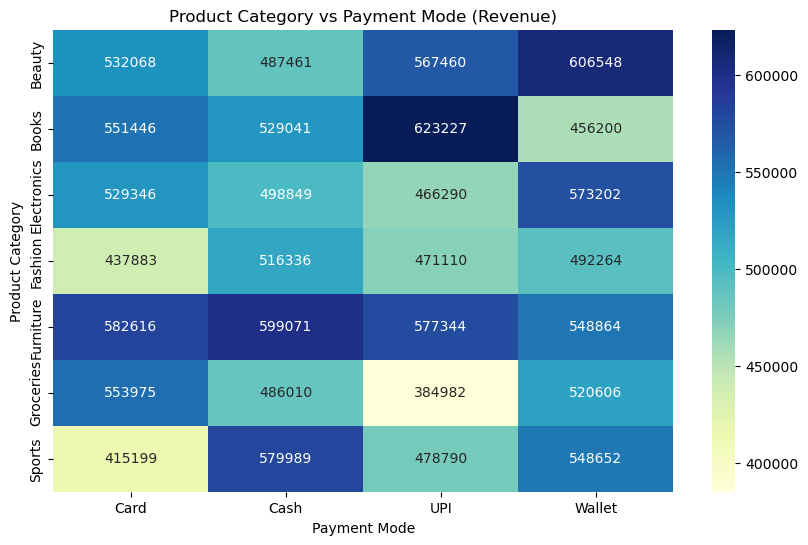

In [113]:
plt.figure(figsize=(10,6))
heatmap_data = pd.pivot_table(df, values="TotalAmount", index="ProductCategory", columns="PaymentMode", aggfunc="sum", fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Product Category vs Payment Mode (Revenue)")
plt.xlabel("Payment Mode")
plt.ylabel("Product Category")
plt.show()